<a href="https://colab.research.google.com/github/ackaashg-eng/Disease-Predictor/blob/main/Breast-Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q scikit-learn matplotlib seaborn joblib imbalanced-learn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report)

In [7]:
import joblib


In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)

In [9]:
df = data.frame
df['target'] = data.target

In [10]:
X = df.drop(columns=['target'])
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [12]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


In [13]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [14]:
for name, model in models.items():
    X_train_p = preprocessor.fit_transform(X_train)
    X_test_p = preprocessor.transform(X_test)

    model.fit(X_train_p, y_train)
    y_pred = model.predict(X_test_p)
    y_prob = model.predict_proba(X_test_p)[:, 1]


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



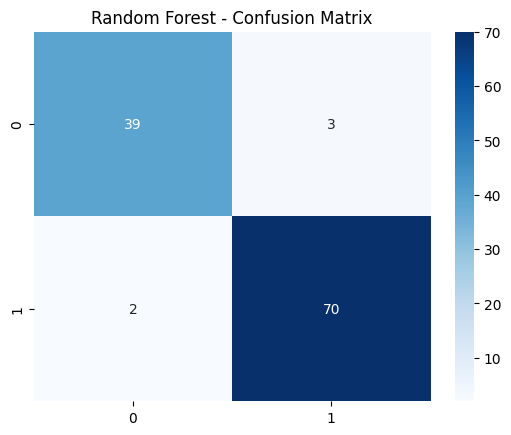

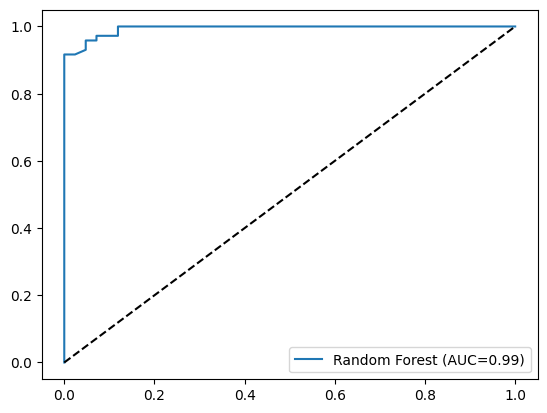

In [15]:
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_prob):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.legend()
    plt.show()


In [16]:
best_model = models["Random Forest"]
joblib.dump(best_model, "best_model.joblib")


['best_model.joblib']

In [17]:
example = X_test.iloc[[0]]
example_p = preprocessor.transform(example)
pred = best_model.predict(example_p)
prob = best_model.predict_proba(example_p)[:, 1]
print("Prediction:", pred, "Probability:", prob)


Prediction: [0] Probability: [0.]


In [18]:
print("\nExample prediction:")
print("Features:\n", example)
print("Prediction:", pred, "Probability:", prob)


Example prediction:
Features:
      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
256        19.55         28.77           133.6     1207.0           0.0926   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
256            0.2063          0.1784               0.1144         0.1893   

     mean fractal dimension  ...  worst radius  worst texture  \
256                 0.06232  ...         25.05          36.27   

     worst perimeter  worst area  worst smoothness  worst compactness  \
256            178.6      1926.0            0.1281             0.5329   

     worst concavity  worst concave points  worst symmetry  \
256           0.4251                0.1941          0.2818   

     worst fractal dimension  
256                   0.1005  

[1 rows x 30 columns]
Prediction: [0] Probability: [0.]


In [19]:
# Probability of each class
y_prob = best_model.predict_proba(X_test_p)[:, 1]  # probability of "disease"
print("Prediction probabilities (first 10):", y_prob[:10])


Prediction probabilities (first 10): [0.   1.   0.12 0.28 0.01 0.99 0.95 0.01 0.   0.  ]


In [20]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.956140350877193


In [21]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
print(df.shape);

(569, 31)
